# Descriptive analysis of the available data
Here a descriptive analysis of the data is performed.

In [106]:
## General libraries for dataframe handling, numeric operations and plotting
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
##Libraries for visualization in Jupyter
#Adding the code folder to the search path of python
from IPython.display import HTML, display
import tabulate

In [ ]:
#Adding the code folder to the search path of python
from sys import path
path.append('../code')

## Importing the dataset

In [135]:
data_path='../data/Monterrey'
figures_path='../images'
processed=os.path.join(data_path, 'processed')
data_filename='AMMfull.pkl'
raw_data=pd.read_pickle(os.path.join(processed,data_filename))

In [26]:
measurements_description=raw_data.describe().round(decimals=2)

In [35]:
with pd.option_context('display.max_columns',None):
    display(measurements_description)

ESTACION    CENTRO                                                    \
MEDIDA          CO        NO       NO2       NOX        O3      PM10   
count     51083.00  47849.00  48450.00  48513.00  43247.00  50504.00   
mean          1.12     11.62     13.62     25.06     22.99     55.60   
std           0.67     17.85     10.40     24.04     19.04     34.91   
min           0.05      0.00      0.00      0.20      0.00      1.00   
25%           0.62      2.20      6.50     10.00      7.00     32.00   
50%           0.95      4.90     11.00     18.00     19.00     48.00   
75%           1.48     13.60     17.80     31.50     33.00     71.00   
max           6.51    271.30    129.90    290.20    146.00    709.00   

ESTACION                                                              \
MEDIDA       PM2.5       PRS     RAINF        RH       SO2        SR   
count     28784.00  51108.00  51695.00  51490.00  20745.00  51368.00   
mean         20.40    711.70      0.00     65.95      4.57      0.17   
std          13.98     11.06      0.03     20.98      2.48      0.28   
min           0.00      0.00      0.00      1.00      0.50      0.00   
25%          11.00    709.60      0.00     51.00      3.20      0.00   
50%          17.00    711.40      0.00     69.00      3.90      0.01   
75%          26.00    713.70      0.00     83.00      5.30      0.27   
max         423.00    737.30      2.07    101.00     50.20      1.10   

ESTACION                                 NORESTE                      \
MEDIDA        TOUT       WDR       WSR        CO        NO       NO2   
count     51495.00  51140.00  51602.00  48533.00  33960.00  32486.00   
mean         22.43    113.55      6.10      1.20     12.85     13.53   
std           6.93     90.96      3.33      0.91     31.09     10.32   
min          -1.06      0.00      0.00      0.01      0.50      0.20   
25%          18.03     51.00      3.50      0.53      3.40      6.60   
50%          23.25     83.00      5.70      0.92      5.00     10.50   
75%          27.25    137.00      8.30      1.60      9.20     17.70   
max          41.63    360.00     21.50     10.01    500.00    100.80   

ESTACION                                                              \
MEDIDA         NOX        O3      PM10     PM2.5       PRS     RAINF   
count     32499.00  48274.00  51216.00  23570.00  52227.00  52294.00   
mean         26.86     23.50     69.89     26.69    719.39      0.00   
std          37.15     16.33     46.73     23.45      5.10      0.04   
min           0.00      1.00      1.00      1.00      0.00      0.00   
25%          10.70     11.00     42.00     13.00    716.90      0.00   
50%          16.40     20.00     60.00     23.00    719.00      0.00   
75%          27.70     33.00     85.00     35.00    721.50      0.00   
max         519.40    138.00    991.00    805.00    737.30      2.40   

ESTACION                                                              \
MEDIDA          RH       SO2        SR      TOUT       WDR       WSR   
count     52017.00  42593.00  50547.00  52269.00  49097.00  52252.00   
mean         67.22      7.30      0.18     22.58    135.04      7.46   
std          20.95      4.37      0.26      7.02    102.42      4.07   
min           2.00      0.00      0.00     -1.07      0.00      0.10   
25%          53.00      4.10      0.00     18.13     77.00      4.20   
50%          71.00      6.50      0.01     23.31    105.00      6.90   
75%          85.00      9.70      0.30     27.43    131.00     10.30   
max          96.00    151.60      0.98     41.39    360.00     28.20   

ESTACION  NORESTE2                                                    \
MEDIDA          CO        NO       NO2       NOX        O3      PM10   
count     35896.00  28227.00  28319.00  28271.00  18754.00  48958.00   
mean          0.94      8.16     14.41     21.30     23.30     62.67   
std           0.63     11.77     11.70     19.71     15.98     46.97   
min           0.05      0.00      0

## Missing data statistics
Completeness of the data, 100% means that there are observations for the variable in the station for the whole period of **Jan, 2012 - Dec, 2017**

In [53]:
#Completeness of the data for all the years (2012-2018)
cm=sns.light_palette("green", as_cmap=True)
((measurements_description.loc['count',:].unstack('MEDIDA')/len(raw_data))*100).round(decimals=2).style.background_gradient(cmap=cm)
#display(missing_data['CO'])

MEDIDA,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WDR,WSR
ESTACION,,,,,,,,,,,,,,,
CENTRO,97.100000,90.950000,92.100000,92.220000,82.210000,96.000000,54.710000,97.150000,98.260000,97.870000,39.430000,97.640000,97.880000,97.210000,98.090000
NORESTE,92.250000,64.550000,61.750000,61.780000,91.760000,97.350000,44.800000,99.280000,99.400000,98.880000,80.960000,96.080000,99.360000,93.330000,99.320000
NORESTE2,68.230000,53.660000,53.830000,53.740000,35.650000,93.060000,46.000000,93.500000,97.260000,82.380000,79.190000,98.680000,98.640000,88.000000,97.250000
NOROESTE,97.300000,71.590000,71.720000,71.740000,94.710000,97.410000,57.250000,96.870000,99.520000,99.490000,95.240000,98.720000,87.070000,99.540000,94.830000
NOROESTE2,51.550000,44.410000,44.380000,44.390000,87.420000,90.600000,0.820000,94.650000,75.950000,96.140000,32.920000,96.890000,96.770000,55.870000,95.270000
NORTE,85.330000,62.980000,63.050000,63.170000,65.180000,91.740000,0.000000,97.920000,98.060000,96.180000,74.020000,97.710000,97.920000,95.390000,95.180000
NORTE2,3.520000,3.090000,3.090000,3.090000,3.930000,3.470000,3.130000,4.180000,4.180000,4.180000,1.600000,4.180000,4.180000,4.180000,4.180000
SUR,3.240000,2.390000,2.390000,2.390000,2.510000,3.800000,2.100000,3.940000,3.940000,3.920000,3.860000,3.940000,3.940000,3.940000,2.480000
SURESTE,94.820000,23.280000,23.290000,23.280000,95.350000,94.690000,61.420000,67.320000,94.520000,92.650000,80.340000,95.340000,94.920000,80.180000,95.210000


## Visualization of the Northweast station
As this is the measurement station with the most complete data, this will be the first station to be analized an to have a predictive model formulated.

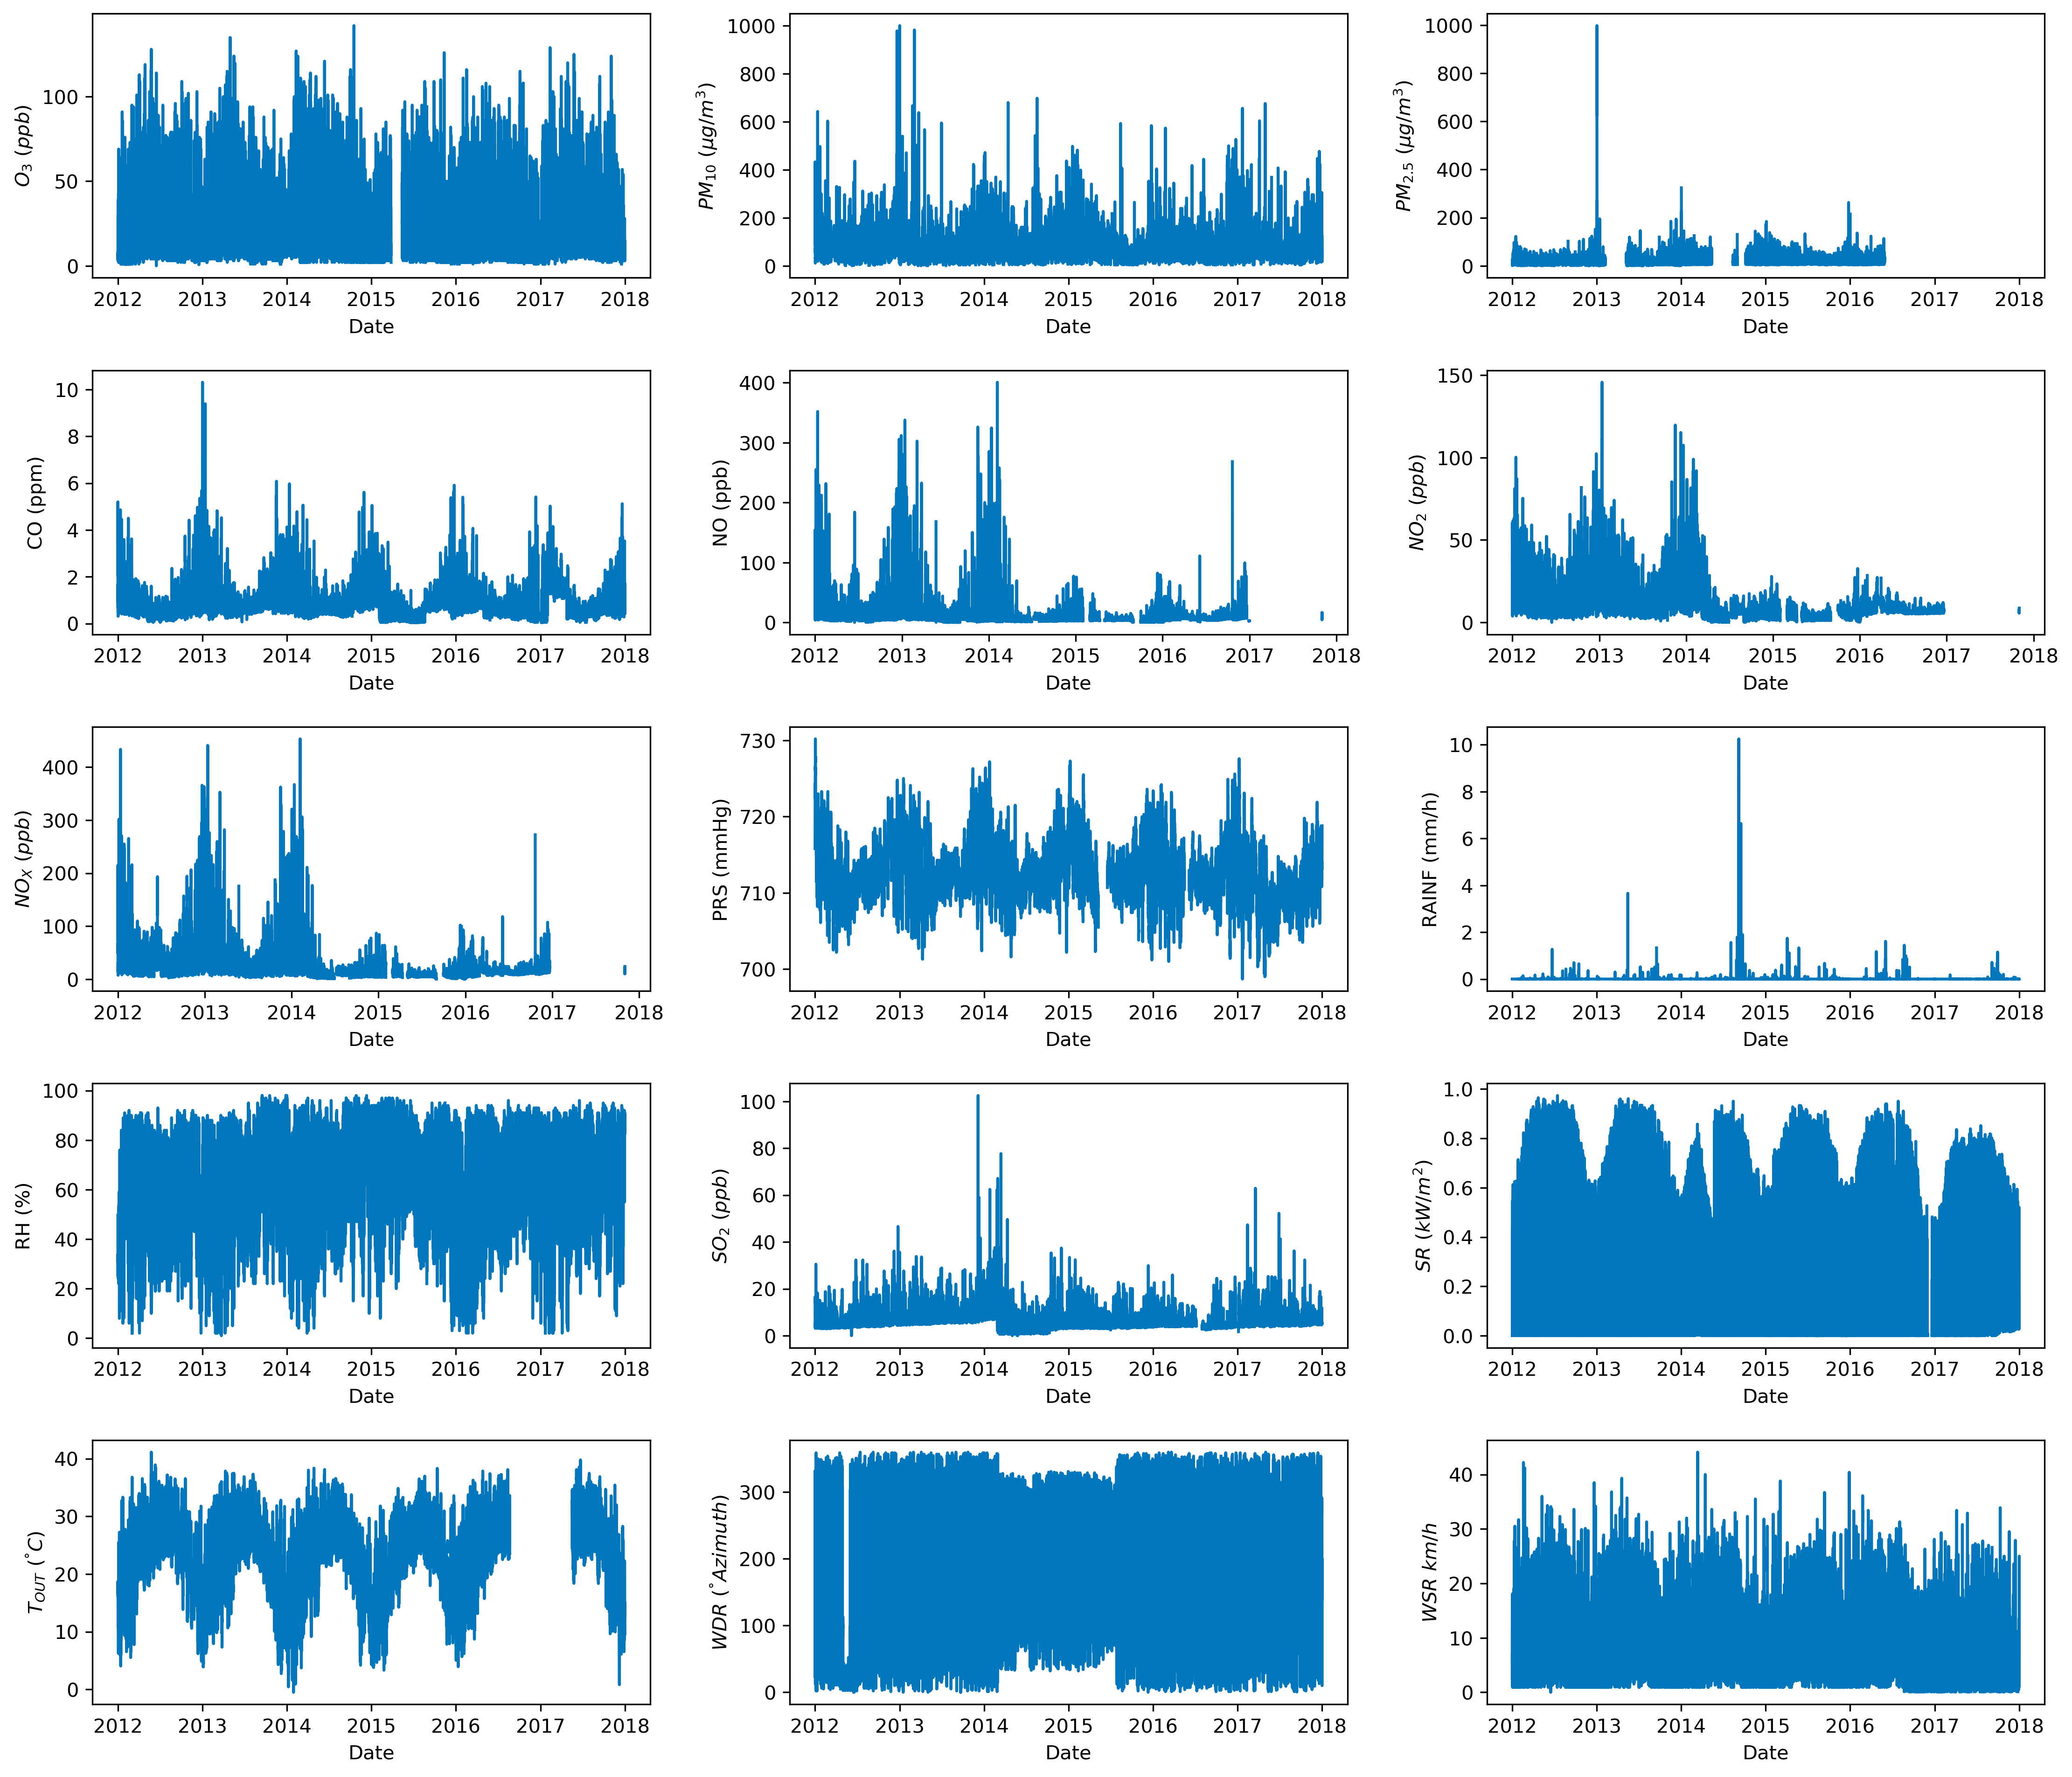

In [148]:
matplotlib.rcParams['text.usetex'] = False
fig, axs=plt.subplots(5,3,figsize=(18,16), dpi=300)
#fig.suptitle('Northwest Station')
#axs=raw_data['NOROESTE'].plot(subplots=True, layout=(5,3),figsize=(18,16))
raw_data['NOROESTE'][['O3','PM10','PM2.5','CO','NO','NO2','NOX','PRS','RAINF','RH','SO2','SR','TOUT','WDR','WSR']].plot(subplots=True,figsize=(18,16),ax=axs, color='#0277BD')

axs[0][2].set_xlim(axs[2][1].get_xlim())

fig.subplots_adjust(wspace=0.25,hspace=0.35)
matplotlib.rcParams['text.usetex'] = True

figs_labels=['$O_3\ (ppb)$',
 '$PM_{10}\ (\mu g/m^3)$',
 '$PM_{2.5}\ (\mu g/m^3)$','CO (ppm)',
 'NO (ppb)',
 '$NO_2\ (ppb)$',
 '$NO_X\ (ppb)$',
 'PRS (mmHg)',
 'RAINF (mm/h)',
 'RH (%)',
 '$SO_2\ (ppb)$',
 '$SR\ (kW/m^2)$',
 '$T_{OUT}\ (^{\degree}C)$',
 '$WDR\ (^{\degree} Azimuth)$',
 '$WSR\ km/h$']
c=0
for item in axs:
    for grph in item:
        grph.get_xlim()
        try:
            grph.get_legend().remove()
        except:
            pass
        grph.set_xlabel('Date')
        grph.set_ylabel(figs_labels[c])
        c+=1      
matplotlib.rcParams['text.usetex'] = False
fig.savefig(os.path.join(figures_path,'raw_input_data_noroeste.eps'), format='eps')